In [216]:
# Neural Networks - Fashion: simple NN model for MNIST Fashion images dataset 
# Shomik Jain, USC CAIS++

# References: Data Used -- Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist)

In [217]:
# Neural Networks: directed, weighted graph with layers of neurons/nodes
# each successive layer = increasingly abstract combinations of features from previous layer
# network learns relevant combinations of features to make more accurrate predictions

In [218]:
# Classification Labels
# 0 = T-shirt, 1 = Trouser, 2 = Pullover, 3 = Dress, 4 = Coat, 
# 5 = Sandal, 6 = Shirt, 7 = Sneaker, 8 = Bag, 9 = Ankle Boot

In [219]:
# 1. Import Dataset & Data Pre-Processing

# Import Fashion-MNIST dataset from 'fashion' folder
from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [220]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ..., 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [221]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

Label:  9
Description:  Ankle boot


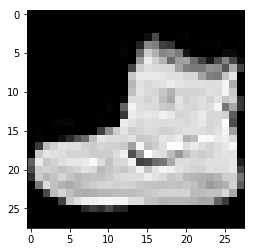

In [222]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

In [223]:
# Normalize feature vectors/pixel values to between 0-1 
X_train = X_train / 255.
X_test = X_test / 255.

In [224]:
# Use Keras to categorize the outputs ("one-hot" vectors)
import keras

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

print(y_test_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


In [225]:
# 2. Create Neural Network Model

In [226]:
# 2.1 -- Initialize the model, add desired layers 

from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# Hidden layer 1: 500 neurons, 'relu' activation (avoid unstable gradient problem)
model.add(Dense(units=500, input_dim=784))
model.add(Activation('relu'))

# Hidden layer 2: 250 neurons, 'relu' activation
model.add(Dense(units=250))
model.add(Activation('relu'))

# Output layer: 10 neurons (one for each class)
model.add(Dense(units=10))
# Softmax activation: output a probability distribution, between 0-1
model.add(Activation('softmax'))

In [227]:
# 2.2 -- Compile the model, get ready to train

model.compile(loss='categorical_crossentropy', # specify crossentropy cost function 
              optimizer='sgd', # stochastic gradient descent
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_46 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 250)               125250    
_________________________________________________________________
activation_47 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                2510      
_________________________________________________________________
activation_48 (Activation)   (None, 10)                0         
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [228]:
# 2.3 -- Set up the callbacks to track the model training/improvement

# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [229]:
# 2.4 -- Fit the model to the training data

# 20 epochs, 32 batch size
# Batch Size: size of training data subset used during each stochastic gradient descent step  

# Validation split: reserve some of our training data to use as "validation" data
    # Won't train on validation data -- check validation loss to look for overfitting
    # used to tune hyperparameters, allows for test set to be used for final evaluation 
    
# Pass in our callbacks to track training progress

model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=0, validation_split = .1, callbacks=callbacks_list)

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

In [230]:
# Note: To launch Tensorboard after training
# Type in command line: `tensorboard --logdir ./logs`
# Open in browser: `http://localhost:6006`

In [231]:
# 3. Evaluate trained model on test data
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 42us/step
[0.34318187980651854, 0.87839999999999996]


In [232]:
# Make sure predictions make sense

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  1
Actual Description:  Trouser


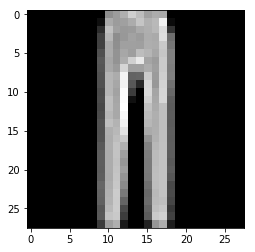

Outputted scores:  [[  1.15493640e-06   9.99991059e-01   8.79475181e-07   6.31049443e-06
    5.80934625e-07   3.14810983e-10   5.30353139e-09   5.46614665e-09
    5.18208161e-08   5.60802516e-10]]
Predicted Label:  1
Predicted Description:  Trouser


In [233]:
visualize_test_sample(24)